<a href="https://colab.research.google.com/github/Edna-soso/DataAnalysis_Project/blob/main/Model/K_Mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pywedge

     |████████████████████████████████| 67.3MB 60kB/s 


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import plotly.express as px
import seaborn as sns
import numpy as np
import pandas as pd
from google.colab import files
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
rfm_segmentation = pd.read_csv('/content/drive/MyDrive/python_OP/RFM_data.csv', encoding = 'unicode_escape')

In [ ]:
class K_means:
  def __init__(self,rfm_segmentation):
    self.rfm_segmentation=rfm_segmentation
  def right_treat(self):
    if var <= 0:
        return 1
    else:
        return var
  def Apply_Nor(self):
    self.rfm_segmentation['Recency'] = self.rfm_segmentation['Recency'].apply(lambda x : right_treat(x))
    self.rfm_segmentation['Monetary'] = self.rfm_segmentation['Monetary'].apply(lambda x : right_treat(x))
  def Check_Skew(self):
    print('Recency Skewness : ' + self.rfm_segmentation['Recency'].skew().astype(str))
    print('Frequency Skewness : ' + self.rfm_segmentation['Frequency'].skew().astype(str))
    print('Monetary Skewness : ' + self.rfm_segmentation['Monetary'].skew().astype(str))
  def Pre_KMean(self):
    log_RFM_data = self.rfm_segmentation[['Recency','Frequency','Monetary']].apply(np.log,axis = 1).round(4)
    ss = StandardScaler()
    Scaled_RFM_data = ss.fit_transform(log_RFM_data)
    Scaled_RFM_data = pd.DataFrame(Scaled_RFM_data,columns=log_RFM_data.columns,index=log_RFM_data.index)
  def Optimal(self):
    """Store it separately for clustering"""
    SS_distance = {}
    for k in range(1,20):
      mod = KMeans(n_clusters= k, max_iter=1000,init = 'k-means++')
      mod = mod.fit(Scaled_RFM_data)
      SS_distance[k] = mod.inertia_

    """ Plot ks vs inertias"""
    plt.figure(figsize = (15,5))
    sns.pointplot(x = list(SS_distance.keys()), y = list(SS_distance.values()))
    plt.xlabel("Number of clusters")
    plt.ylabel("Sum of square Distances")
    plt.title("Elbow Techinque to find the optimal cluster size")
  def Perform_KMeans(self):
    KM_clust = KMeans(n_clusters= 3, init = 'k-means++',max_iter = 1000)
    KM_clust.fit(Scaled_RFM_data)
    self.rfm_segmentation['Cluster'] = KM_clust.labels_
    self.rfm_segmentation['Cluster'] = 'Cluster' + self.rfm_segmentation['Cluster'].astype(str)
    return self.rfm_segmentation
  def Data(self):
    self.rfm_segmentation

Recency Skewness : 1.2578896378884323
Frequency Skewness : 17.977687113494753
Monetary Skewness : 20.65739322066744


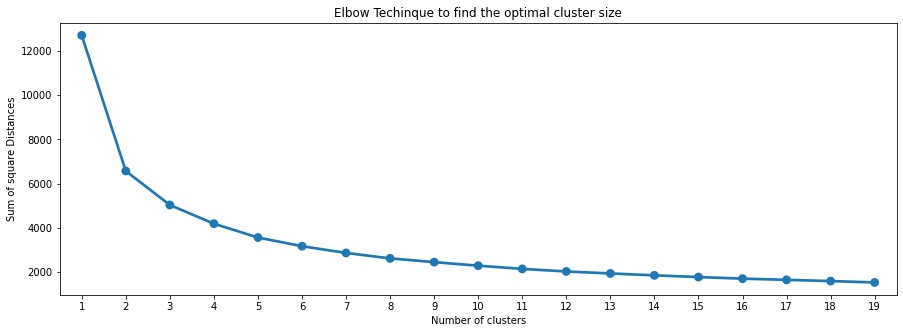

In [ ]:
df=K_means(RFM_data)
df.Apply_Nor()
df.Data()
df.Check_Skew()
df.Pre_KMean()
df.Optimal()
df.Pre_KMean()

In [ ]:
df.Perform_KMeans()

,Unnamed: 0,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Group,RFM_Score,RFM_Loyality_level,Cluster
0,0,12347.0,2,182,4310.00,1,1,1,111,3,True Lover,Cluster1
1,1,12348.0,75,31,1797.24,3,3,1,331,7,Flirting,Cluster2
2,2,12349.0,18,73,1757.55,2,2,1,221,5,True Lover,Cluster2
3,3,12350.0,310,17,334.40,4,4,3,443,11,Platonic Friend,Cluster0
4,4,12352.0,36,85,2506.04,2,2,1,221,5,True Lover,Cluster2
...,...,...,...,...,...,...,...,...,...,...,...,...
4234,4234,18280.0,277,10,180.60,4,4,4,444,12,Platonic Friend,Cluster0
4235,4235,18281.0,180,7,80.82,4,4,4,444,12,Platonic Friend,Cluster0
4236,4236,18282.0,7,12,178.05,1,4,4,144,9,Potential lover,Cluster0
4237,4237,18283.0,3,754,2090.43,1,1,1,111,3,True Lover,Cluster1


In [ ]:
RFM_data.to_csv('K-Mean_data.csv') 
files.download('K-Mean_data.csv')